In [1]:
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path_linear = "../../data/jpg/fillter_processing/Linear/"
files_linear = glob.glob(os.path.join(path_linear, "*.jpg"))

path_log = "../../data/jpg/fillter_processing/Log/"
files_log = glob.glob(os.path.join(path_log, "*.jpg"))

path_power = "../../data/jpg/fillter_processing/Power/"
files_power = glob.glob(os.path.join(path_power, "*.jpg"))

path_Sqrt = "../../data/jpg/fillter_processing/Sqrt/"
files_Sqrt = glob.glob(os.path.join(path_Sqrt, "*.jpg"))

path_square = "../../data/jpg/fillter_processing/Squarded/"
files_square = glob.glob(os.path.join(path_square, "*.jpg"))

path_ASINH = "../../data/jpg/fillter_processing/ASINH/"
files_ASINH = glob.glob(os.path.join(path_ASINH, "*.jpg"))

path_SINH = "../../data/jpg/fillter_processing/SINH/"
files_SINH = glob.glob(os.path.join(path_SINH, "*.jpg"))


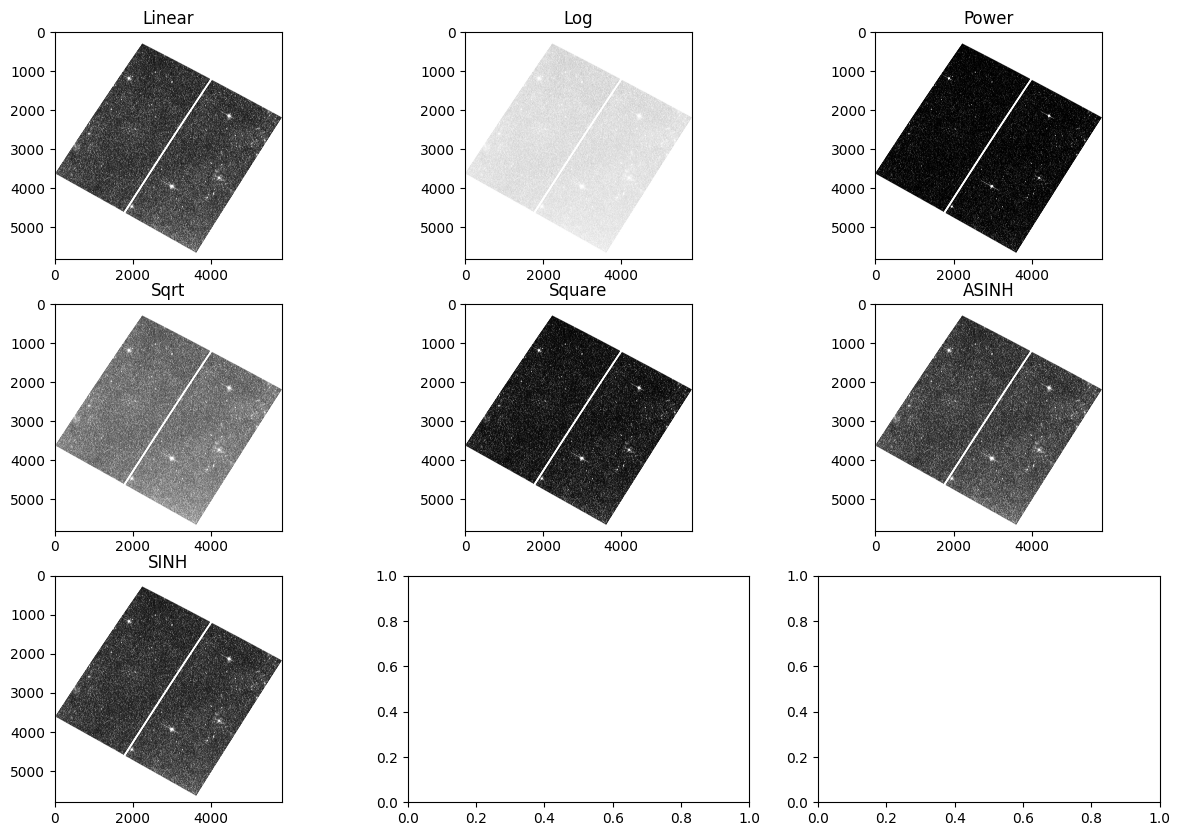

In [3]:
# plot all images
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
ax[0, 0].imshow(cv2.imread(files_linear[0]))
ax[0, 0].set_title("Linear")
ax[0, 1].imshow(cv2.imread(files_log[0]))
ax[0, 1].set_title("Log")
ax[0, 2].imshow(cv2.imread(files_power[0]))
ax[0, 2].set_title("Power")
ax[1, 0].imshow(cv2.imread(files_Sqrt[0]))
ax[1, 0].set_title("Sqrt")
ax[1, 1].imshow(cv2.imread(files_square[0]))
ax[1, 1].set_title("Square")
ax[1, 2].imshow(cv2.imread(files_ASINH[0]))
ax[1, 2].set_title("ASINH")
ax[2, 0].imshow(cv2.imread(files_SINH[0]))
ax[2, 0].set_title("SINH")
plt.show()


In [4]:
files_SINH

['../../data/jpg/fillter_processing/SINH\\hst_10190_12_acs_wfc_f814w_j90o12_drc.jpg',
 '../../data/jpg/fillter_processing/SINH\\hst_10190_28_acs_wfc_f814w_j90o28_drc.jpg',
 '../../data/jpg/fillter_processing/SINH\\hst_14610_02_acs_wfc_f814w_jdb602_drc.jpg',
 '../../data/jpg/fillter_processing/SINH\\hst_14610_12_acs_wfc_f814w_jdb612_drc.jpg',
 '../../data/jpg/fillter_processing/SINH\\hst_14610_18_acs_wfc_f814w_jdb618_drc.jpg',
 '../../data/jpg/fillter_processing/SINH\\hst_14610_23_acs_wfc_f814w_jdb623_drc.jpg',
 '../../data/jpg/fillter_processing/SINH\\hst_14610_27_acs_wfc_f814w_jdb627_drc.jpg',
 '../../data/jpg/fillter_processing/SINH\\hst_14610_30_acs_wfc_f814w_jdb630_drc.jpg',
 '../../data/jpg/fillter_processing/SINH\\hst_14610_50_acs_wfc_f814w_jdb650_drc.jpg',
 '../../data/jpg/fillter_processing/SINH\\hst_16274_54_acs_wfc_f814w_je9t54_drc.jpg']

In [5]:
# load 1 image form each folder with grayscale
img_linear = cv2.imread(files_linear[0], 0)
img_log = cv2.imread(files_log[0], 0)
img_power = cv2.imread(files_power[0], 0)
img_Sqrt = cv2.imread(files_Sqrt[0], 0)
img_square = cv2.imread(files_square[0], 0)
img_ASINH = cv2.imread(files_ASINH[0], 0)
img_SINH = cv2.imread(files_SINH[0], 0)

In [6]:
img_linear[2000:2000+100, 1000:1000+100]

array([[255, 255, 255, ..., 148,  71,  58],
       [255, 255, 255, ...,  59,  42,  46],
       [255, 255, 255, ...,  19,  36,  32],
       ...,
       [253, 255, 255, ...,  64,  57,  61],
       [255, 240, 245, ..., 103,  68,  68],
       [255, 255,  52, ..., 167, 104,  79]], dtype=uint8)

In [7]:
img_linear.shape

(5802, 5810)

# Combine to x Chanels

In [40]:
# combine all imgaes with many channels
# def combine_fillter(img_linear, img_log, img_power, img_Sqrt, img_square, img_ASINH, img_SINH):
def combine_fillter(img_linear, img_power, img_ASINH):
    img_combined = np.zeros((img_linear.shape[0], img_linear.shape[1], 3), dtype=np.uint8)
    # img_combined[:, :, 0] = img_ASINH
    # img_combined[:, :, 1] = img_linear
    # img_combined[:, :, 2] = img_power

    img_combined[:, :, 0] = img_power
    img_combined[:, :, 1] = img_linear
    img_combined[:, :, 2] = img_ASINH



    # img_combined[:, :, 3] = img_Sqrt
    # img_combined[:, :, 4] = img_square
    # img_combined[:, :, 5] = img_ASINH
    # img_combined[:, :, 6] = img_SINH
    return img_combined

In [19]:
# get only file name
for i in range(len(files_linear)):
    # if all files are same name
    if files_linear[i].split("\\")[-1] == files_log[i].split("\\")[-1] == files_power[i].split("\\")[-1] == files_Sqrt[i].split("\\")[-1] == files_square[i].split("\\")[-1] == files_ASINH[i].split("\\")[-1] == files_SINH[i].split("\\")[-1]:
        # combine all images with 7 channels in grayscale
        img_combined = combine_fillter(img_linear, img_log, img_power, img_Sqrt, img_square, img_ASINH, img_SINH)
    else:
        print("error")
    

In [10]:
img_combined.shape

(5802, 5810, 3)

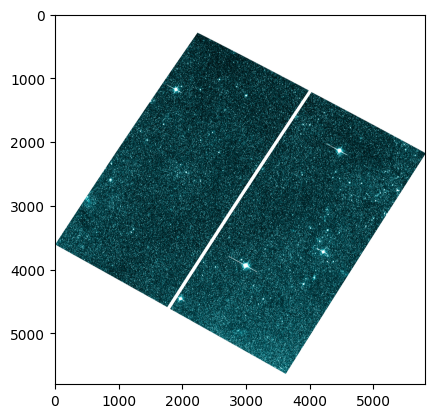

In [27]:
# plot combined image
plt.imshow(img_combined)
plt.show()

## save conbined image

In [49]:
# the image is saved in the same old resolution = len data in numpy array with 3 channels
def save_image(data, fn):
    sizes = np.shape(data)
    height = float(sizes[0])
    width = float(sizes[1])
    # print(sizes, width, height)
     
    fig = plt.figure()
    fig.set_size_inches(width/height, 1, forward=False)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
 
    ax.imshow(data)
    plt.savefig(fn, dpi = height) 
    plt.close()

In [39]:
# load all images
path_linear = "../../data/data_augmentation/filters/images_filters/Linear/"
files_linear = glob.glob(os.path.join(path_linear, "*.jpg"))

path_ASINH = "../../data/data_augmentation/filters/images_filters/ASINH/"
files_ASINH = glob.glob(os.path.join(path_ASINH, "*.jpg"))

path_power = "../../data/data_augmentation/filters/images_filters/Power/"
files_power = glob.glob(os.path.join(path_power, "*.jpg"))


In [ ]:
# combine all images via combine_fillter and save into new folder
# counter = 0
for i in range(len(files_linear)):
    img_linear = cv2.imread(files_linear[i], 0)
    img_power = cv2.imread(files_power[i], 0)
    img_ASINH = cv2.imread(files_ASINH[i], 0)
    img_combined = combine_fillter(img_linear, img_power, img_ASINH)
    # save image into ../../data/data_augmentation/3channels/images/
    save_image(img_combined, "../../data/data_augmentation/3channels/images/" + files_linear[i].split("\\")[-1])
    # counter += 1
    # if counter == 10:
    #     break
print("Done")

# Merge by average

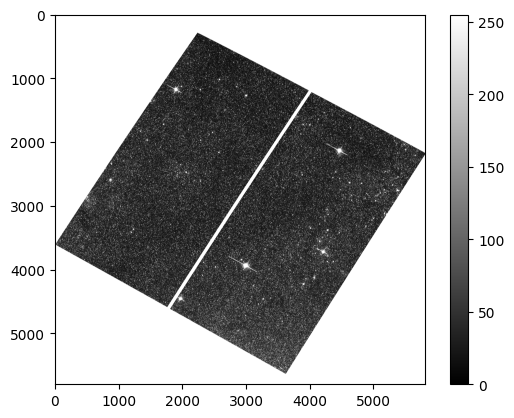

In [31]:
# by mearge with mean follow : https://stackoverflow.com/questions/44112358/opencv-python-merge-different-channel-images-into-one
chanles = 3
merged_img =  img_linear/chanles + img_power/chanles + img_ASINH/chanles
plt.imshow(merged_img, cmap="gray")
plt.colorbar()
plt.show()